#### step:-1 Importing required modules

In [1]:
import pandas as pd    # type: ignore #data series
import numpy as np     # Fundamental library for numerical computing with support for arrays and matrices.
import matplotlib.pyplot as plt    # one should v
from sklearn.model_selection import train_test_split   # Splits data into training and testing sets for model evaluation.
import seaborn as sns    # Provides a high-level interface for creating attractive statistical graphics.
from sklearn.preprocessing import StandardScaler  # Standardizes features by removing the mean and scaling to unit variance.
from sklearn.ensemble import RandomForestClassifier   # An ensemble learning method that combines multiple decision trees for improved accuracy
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,ConfusionMatrixDisplay   #Provides functions to evaluate the performance of classification models.
from sklearn.linear_model import LogisticRegression  # A linear model used for binary classification tasks.
import warnings  # Manages and suppresses warnings to keep output clean.
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier  #A versatile algorithm for both classification and regression tasks.



#### step:-2 Loading Data

In [2]:
wine_ql = pd.read_csv(r"WineQT.csv")  #  Loads a CSV file named "WineQT.csv" into a Pandas DataFrame named wine_ql for further data manipulation and analysis.

In [3]:
wine_ql.head(5) # Displaying the first 5 rows data in the csv file

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
#Creates a copy of the wine_ql DataFrame named wine_df, 
#allowing independent manipulation without affecting the original DataFrame.

In [5]:
wine_df =wine_ql.copy()
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


#### step:-3 Exploratory Data Analysis

In [6]:
wine_df .info() # checking the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
wine_df.isnull().sum() # checking null values


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [9]:
for features in wine_df.columns:
    print(features)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality
Id


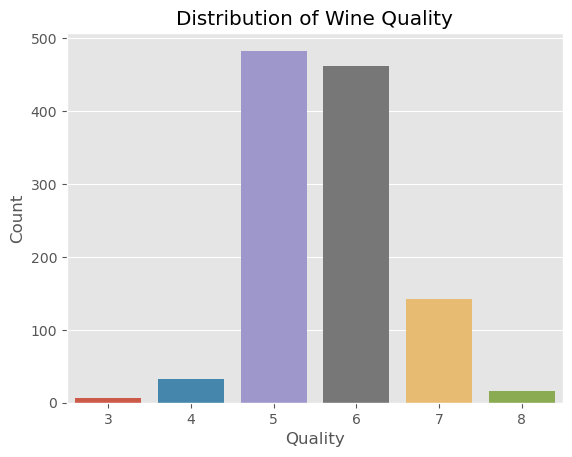

In [13]:
sns.countplot(x='quality', data=wine_df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


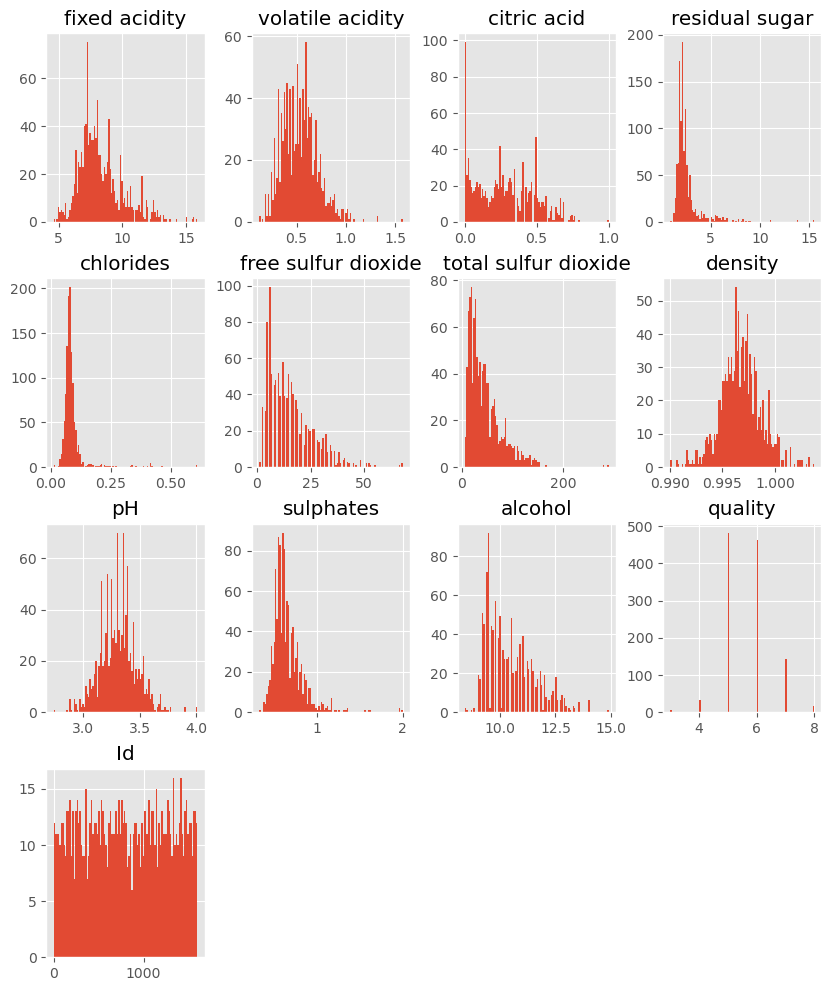

In [14]:
wine_df.hist(bins=100, figsize=(10,12))
plt.show()

In [17]:
#Calculates the correlation of each column with 'quality' and sorts the results.
wine_df.corr()['quality'].sort_values()

volatile acidity       -0.407394
total sulfur dioxide   -0.183339
density                -0.175208
chlorides              -0.124085
free sulfur dioxide    -0.063260
pH                     -0.052453
residual sugar          0.022002
Id                      0.069708
fixed acidity           0.121970
citric acid             0.240821
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

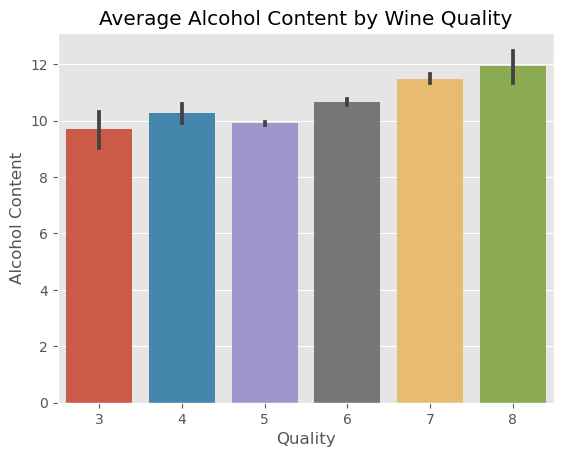

In [19]:
sns.barplot(x='quality', y='alcohol', data=wine_df)
plt.title('Average Alcohol Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()


#### step :-4 Data Processing

In [20]:
wine_df['quality'] = wine_df.quality.apply(lambda x:1 if x>=7 else 0)
# Convert 'quality' column to binary values: 1 if value is >= 7, else 0

In [21]:
wine_df['quality'].value_counts()


quality
0    984
1    159
Name: count, dtype: int64

In [22]:

X = wine_df.drop('quality', axis=1)
y = wine_df['quality']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# Split the data into training and testing sets with a 70-30 ratio and a fixed random seed for reproducibility


In [24]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (800, 12)
y_train  (800,)
X_test  (343, 12)
y_test  (343,)


#### step:-5 Model Selection

<center> Logistic Regression Model</center>

In [42]:
# Instantiate Logistic Regression model and fit it to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict using the fitted model on the test data
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))

test accuracy is: 88.92%


In [26]:
print(classification_report(y_test, logreg_pred))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       298
           1       0.65      0.33      0.44        45

    accuracy                           0.89       343
   macro avg       0.78      0.65      0.69       343
weighted avg       0.87      0.89      0.87       343



TN:  290
FN:  30
TP:  15
FP:  8


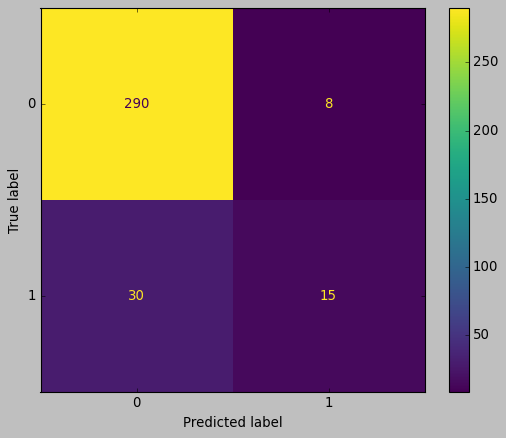

In [35]:
plt.style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])


<center> Decision Tree</center>

In [36]:
# Instantiate Decision Tree Classifier model and fit it to the training data
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 85.13%


In [37]:
print(classification_report(y_test, dtree_pred))


              precision    recall  f1-score   support

           0       0.94      0.89      0.91       298
           1       0.45      0.62      0.52        45

    accuracy                           0.85       343
   macro avg       0.70      0.75      0.72       343
weighted avg       0.88      0.85      0.86       343



TN:  264
FN:  17
TP:  28
FP:  34


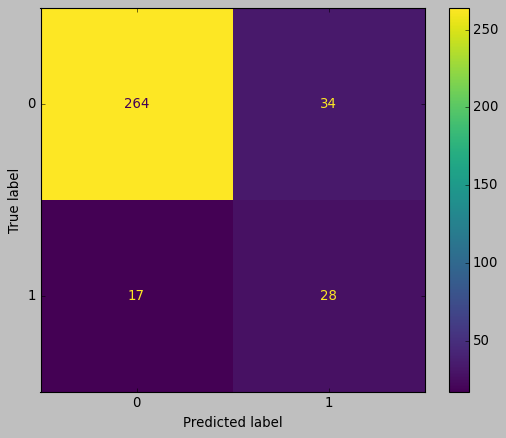

In [38]:
plt.style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])


<center> Random Forest</center>

In [39]:
# Instantiate Random Forest Classifier model and fit it to the training data
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 90.38%


In [40]:
print(classification_report(y_test, rforest_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.95       298
           1       0.70      0.47      0.56        45

    accuracy                           0.90       343
   macro avg       0.81      0.72      0.75       343
weighted avg       0.89      0.90      0.90       343



TN:  289
FN:  24
TP:  21
FP:  9


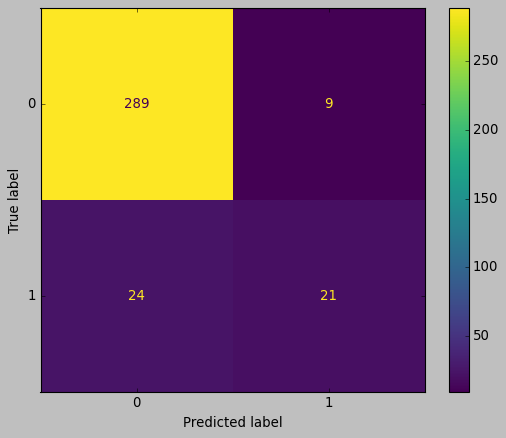

In [41]:
plt.style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=rforest.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])
